In [1]:
import pandas as pd

In [2]:
!pwd

/home/nickdg/Desktop/cph_pythonworkshop2018/Day2


In [7]:
df = pd.read_excel('proteins.xls', header=[0, 1], )
df.head()

Species    Human             Yeast            
Rep            1     2     3     1     2     3
ProteinID                                     
HDXWPLEMPC  2966  3059  3059  2998  3009  3083
6SUN1O12BY  3062  3003  3037  3002  3029  3054
6RDX2LK7TT  2936  2975  3043  2985  2955  2928
JVA4QMGSKP  3028  3026  3074  3098  3026  2994
SSAS9WGCIZ  3007  2909  2983  3064  3092  2921

In [8]:
df.columns

MultiIndex(levels=[['Human', 'Yeast'], ['1', '2', '3']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=['Species', 'Rep'])

In [15]:
df.columns = pd.MultiIndex.from_product([['a', 'b'], ['1', '2', '3']], names=['G', 'H'])

In [16]:
df.head()

G              a                 b            
H              1     2     3     1     2     3
ProteinID                                     
HDXWPLEMPC  2966  3059  3059  2998  3009  3083
6SUN1O12BY  3062  3003  3037  3002  3029  3054
6RDX2LK7TT  2936  2975  3043  2985  2955  2928
JVA4QMGSKP  3028  3026  3074  3098  3026  2994
SSAS9WGCIZ  3007  2909  2983  3064  3092  2921

In [17]:
df = pd.read_excel('proteins.xls', header=[0, 1], )
df.head()

Species    Human             Yeast            
Rep            1     2     3     1     2     3
ProteinID                                     
HDXWPLEMPC  2966  3059  3059  2998  3009  3083
6SUN1O12BY  3062  3003  3037  3002  3029  3054
6RDX2LK7TT  2936  2975  3043  2985  2955  2928
JVA4QMGSKP  3028  3026  3074  3098  3026  2994
SSAS9WGCIZ  3007  2909  2983  3064  3092  2921

In [19]:
df.loc['JVA4QMGSKP']

Species  Rep
Human    1      3028
         2      3026
         3      3074
Yeast    1      3098
         2      3026
         3      2994
Name: JVA4QMGSKP, dtype: int64

In [23]:
df.iloc[7]

Species  Rep
Human    1      2887
         2      2866
         3      3014
Yeast    1      2902
         2      2919
         3      3056
Name: 3MAT63UHQ8, dtype: int64

In [32]:
df['Human'].head()

Rep,1,2,3
ProteinID,,,
HDXWPLEMPC,2966,3059,3059
6SUN1O12BY,3062,3003,3037
6RDX2LK7TT,2936,2975,3043
JVA4QMGSKP,3028,3026,3074
SSAS9WGCIZ,3007,2909,2983


## Ttests

In [34]:
from scipy import stats

In [41]:
results = stats.ttest_ind(df['Human'], df['Yeast'], axis=1)
results

Ttest_indResult(statistic=array([-0.04889211,  0.24903246,  0.81132075, ..., -0.69479452,
        1.08306512,  0.29242266]), pvalue=array([0.96334917, 0.81560018, 0.46269716, ..., 0.52543063, 0.3397024 ,
       0.78450435]))

In [44]:
len(df)

3000

In [45]:
assert len(results.statistic) == len(df), "ttest was done wrong in direction"

In [50]:
df.index[results.pvalue < .05]

Index(['X5AYSQSHAG', 'NEMOJ29JX3', 'S8WJ7MGER1', 'VVU0NG047S', '8N3BO2B5UD',
       '0NL15HZAI9', 'MNNQVMQ8AD', '6UFD2U6HCR', 'DW6Q33H9HY', 'FRKX4BKU12',
       ...
       'VAJA65R6NS', 'WMPKZT5J6L', 'Y8ORCL5II3', 'E3O2GYDPNE', '94NR5NKACL',
       'H2XCPGDSWG', 'WHG4GA0RED', 'NVALQ0NMZS', 'WOXJZ78HMF', 'Q6Z8FYB0UF'],
      dtype='object', name='ProteinID', length=157)

In [52]:
stats = pd.DataFrame()
stats['ProteinID'] = df.index
stats['T'] = results.statistic
stats['pvalue'] = results.pvalue

stats.head()

,ProteinID,T,pvalue
0,HDXWPLEMPC,-0.048892,0.963349
1,6SUN1O12BY,0.249032,0.815600
2,6RDX2LK7TT,0.811321,0.462697
3,JVA4QMGSKP,0.096565,0.927716
4,SSAS9WGCIZ,-0.978894,0.383058


In [59]:
merged = pd.merge(df, stats[stats['pvalue'] < .05], left_index=True, right_on='ProteinID')
merged.head()

/home/nickdg/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:543: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(Human, 1)","(Human, 2)","(Human, 3)","(Yeast, 1)","(Yeast, 2)","(Yeast, 3)",ProteinID,T,pvalue
28,2920,2964,2970,3040,3081,3004,X5AYSQSHAG,-3.313513,0.029557
38,2997,2966,3038,2879,2877,2945,NEMOJ29JX3,3.272295,0.030723
52,2962,2961,2919,3069,3074,2999,S8WJ7MGER1,-3.564867,0.023483
120,2967,2952,3017,3034,3032,3058,VVU0NG047S,-2.934993,0.042601
131,3024,3000,3027,3057,3065,3045,8N3BO2B5UD,-3.741935,0.020087


In [60]:
merged[('Human', '1')].head()

28     2920
38     2997
52     2962
120    2967
131    3024
Name: (Human, 1), dtype: int64

In [61]:
len(merged)

157

In [62]:
df.head()

Species    Human             Yeast            
Rep            1     2     3     1     2     3
ProteinID                                     
HDXWPLEMPC  2966  3059  3059  2998  3009  3083
6SUN1O12BY  3062  3003  3037  3002  3029  3054
6RDX2LK7TT  2936  2975  3043  2985  2955  2928
JVA4QMGSKP  3028  3026  3074  3098  3026  2994
SSAS9WGCIZ  3007  2909  2983  3064  3092  2921

In [74]:
import numpy as np

In [81]:
np.tile([1, 2, 3], 2)

array([1, 2, 3, 1, 2, 3])

In [86]:
dd

,a,b
0,a,aa
1,b,bb


In [89]:
dd = pd.DataFrame()
dd['a'] = ['a', 'b']
dd['b'] = ['aa', 'bb']
ddl = pd.melt(dd, value_vars=['a', 'b'], value_name='intensity')
ddl['index'] = np.tile(dd.index, dd.shape[1])
ddl

,variable,intensity,index
0,a,a,0
1,a,b,1
2,b,aa,0
3,b,bb,1


In [79]:
dfl = pd.melt(df, value_name='Intensity')
# dfl['ProteinID'] = np.tile(df.index.get_values(), df.shape[1])
dfl.head()

,Species,Rep,Intensity
0,Human,1,2966
1,Human,1,3062
2,Human,1,2936
3,Human,1,3028
4,Human,1,3007


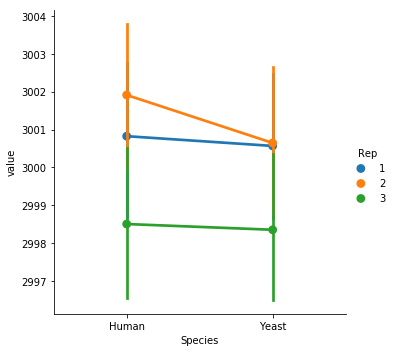

In [69]:
import seaborn as sns
sns.catplot(x='Species', y='value', hue='Rep', data=dfl, kind='point')